In [14]:
#импорт необходимых библиотек
import numpy as np
import pandas as pd
import os
import fileinput
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [15]:
#загрузка метеорологических данных
file_paths, dfs = [], []
for root, dirs, files in os.walk('C:/data/data_1'):
    for file in files:
        if file == 'meteo.txt':
            file_paths.append(os.path.join(root, file))
for file_path in file_paths:
    df = pd.read_fwf(file_path)
    dfs.append(df)
meteo_decades_df = pd.concat(dfs, ignore_index=True)
meteo_decades_df

,IDEN OBSR,DAYP,TIME CCCC,T0T0,TEMP,TMAX,TMIN,TGTG,SPED,OSAD,...,DDDD,UDUD,SSSD,NNN0,NN25,NNNR,NNTR,NNRS,NNNM,NNNB
0,2247120170101,1.11,4.01arhn,-10.0,-23.7,-1.0,-44.0,-48.0,12.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2255920170101,1.11,4.01arhn,-9.0,-21.6,2.0,-40.0,-44.0,12.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2265620170101,1.11,4.01arhn,-9.0,-22.6,2.0,-42.0,-43.0,13.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2268620170101,1.11,4.04arhn,-9.0,-24.5,0.0,-44.0,-45.0,9.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2276820170101,1.11,4.01arhn,-10.0,-22.5,1.0,-40.0,-43.0,13.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201813,6730320221203,1.01,3.46zbkl,NaN,NaN,-14.0,-35.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201814,6735120221203,1.01,3.46zbkl,NaN,NaN,-8.0,-32.0,-34.0,14.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201815,6735220221203,1.01,3.46zbkl,NaN,NaN,-10.0,-32.0,-33.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201816,6780120221203,1.06,5.18qkut,NaN,NaN,-25.0,-47.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#конвейер для обработки метеорологических данных
pipeline_meteo = Pipeline([
    ('extract_iden_obsr', FunctionTransformer(lambda x: x.assign(IDEN=x['IDEN    OBSR'].astype(str).str[:5], OBSR=x['IDEN    OBSR'].astype(str).str[5:13]))),
    ('drop_columns', FunctionTransformer(lambda x: x.drop(columns=['IDEN    OBSR', 'SSSD', 'NNN0', 'NN25', 'NNNR', 'NNTR', 'NNRS', 'NNNM', 'NNNB', 'NNTX', 'NNNU', 'NNTG', 'NNR1', 'NNR5', 'NNNF', 'NNNG', 'TZTZ', 'TRTR', 'TT10', 'TIME    CCCC', 'SPED', 'DAYP', 'TMAX', 'TMIN', 'TGTG', 'R0R0', 'RMAX', 'T0T0', 'UDUD'], axis=1))),
    ('extract_month_year', FunctionTransformer(lambda x: x.assign(YEAR=x['OBSR'].astype(str).str[:4], MONTH = x['OBSR'].astype(str).str[4:6], DEC=x['OBSR'].astype(str).str[6:8]))),
    ('drop_obsr', FunctionTransformer(lambda x: x.drop(columns=['OBSR'], axis=1)))
])
meteo_df = pipeline_meteo.fit_transform(meteo_decades_df)
meteo_df

,TEMP,OSAD,DDDD,IDEN,YEAR,MONTH,DEC
0,-23.7,8.0,NaN,22471,2017,01,01
1,-21.6,6.0,NaN,22559,2017,01,01
2,-22.6,5.0,NaN,22656,2017,01,01
3,-24.5,7.0,NaN,22686,2017,01,01
4,-22.5,9.0,NaN,22768,2017,01,01
...,...,...,...,...,...,...,...
201813,NaN,5.0,NaN,67303,2022,12,03
201814,NaN,4.0,NaN,67351,2022,12,03
201815,NaN,5.0,NaN,67352,2022,12,03
201816,NaN,2.0,NaN,67801,2022,12,03


In [17]:
import chardet
merged_df = pd.DataFrame()
folder_path = 'C:/data/data_y'

file_list = os.listdir(folder_path)

for file_name in file_list:
    if file_name.startswith('purpose_dry_') and file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        
        with open(file_path, 'rb') as f:
            result = chardet.detect(f.read())
            encoding = result['encoding']
        
        temp_df = pd.read_csv(file_path, delimiter=',', encoding=encoding).replace({'н/д': np.nan}).apply(pd.to_numeric, errors='coerce')
        temp_df.drop('NAME', axis=1, inplace=True)

        if merged_df.empty:
            merged_df = temp_df
        else:
            merged_df = pd.merge(merged_df, temp_df, on=['IDEN'], how='outer')

In [18]:
pipeline_purpose = Pipeline([
    ('melt', FunctionTransformer(lambda x: pd.melt(x, id_vars=['IDEN'], var_name='DATE', value_name='DRY').dropna())),
    ('extract_month_year', FunctionTransformer(lambda x: x.assign(YEAR=x['DATE'].astype(str).str[:4], MONTH = x['DATE'].astype(str).str[4:6], DEC=x['DATE'].astype(str).str[6:8]))),
    ('dropna', FunctionTransformer(lambda x: x.dropna()))
])
purpose_df = pipeline_purpose.fit_transform(merged_df)
purpose_df

,IDEN,DATE,DRY,YEAR,MONTH,DEC
66,34110,20170501,3.0,2017,05,01
67,34116,20170501,3.0,2017,05,01
68,34202,20170501,2.0,2017,05,01
69,34213,20170501,3.0,2017,05,01
70,34214,20170501,3.0,2017,05,01
...,...,...,...,...,...,...
177991,28937,20220903,3.0,2022,09,03
177997,30507,20220903,3.0,2022,09,03
178002,30977,20220903,2.0,2022,09,03
178005,30826,20220903,3.0,2022,09,03


In [19]:
purpose_df['DEC'] = purpose_df['DEC'].astype(int)
purpose_df['MONTH'] = purpose_df['MONTH'].astype(int)
purpose_df['IDEN'] = purpose_df['IDEN'].astype(int)

meteo_df['DEC'] = meteo_df['DEC'].astype(int)
meteo_df['IDEN'] = meteo_df['IDEN'].astype(int)
meteo_df['MONTH'] = meteo_df['MONTH'].astype(int)

meteo_df = meteo_df.query('MONTH > 3 & MONTH <= 9')

In [20]:
purpose_df = pd.merge(meteo_df, purpose_df[['IDEN', 'DEC', 'MONTH', 'YEAR', 'DRY']], on=['IDEN', 'DEC', 'MONTH', 'YEAR'], how='inner')

In [21]:
from dbfread import DBF

dbf_path = 'C:/st/russian stations.dbf'
table = DBF(dbf_path, encoding='cp1251')
df = pd.DataFrame(iter(table))

df.rename(columns = {'SNUM': 'IDEN'}, inplace = True)
df['IDEN'] = df['IDEN'].astype(int)

df.drop_duplicates(subset=['IDEN'], keep='first', inplace=True)
df

,STNNUM,NAME,UGMS,IDEN,LAT,LON,FOLDN,OWN1,OWN2,TM1_SR0,...,VOSHOD77,SUT77,TMM1,TMS,TMSS,TMSM,BSUT,ESUT,BSRO,ESRO
0,4154770,Ахты,13,37663,42.47,47.75,0,Россия,Респ. Дагестан,1,...,1,1,1,1,1,1,1910.0,2004.0,1910.0,2004.0
1,4174820,Касумкент,13,37597,41.70,48.20,0,Россия,Респ. Дагестан,0,...,1,1,1,1,1,1,1936.0,2004.0,1936.0,2004.0
2,4214640,Тлярата,13,37468,42.12,46.35,1,Россия,Респ. Дагестан,0,...,1,1,1,1,1,1,1959.0,2004.0,1959.0,2004.0
3,4214710,"Кумух,АМСГ",13,37477,42.10,47.10,1,Россия,Респ. Дагестан,0,...,1,1,1,1,1,1,1966.0,2004.0,1966.0,2004.0
4,4214780,Маджалис,13,37479,42.10,47.80,0,Россия,Респ. Дагестан,0,...,1,1,1,1,1,1,1936.0,2004.0,1936.0,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,8023680,О.Виктория,1,20026,80.20,36.80,1,Россия,Ненецкий а.о.,0,...,1,1,1,1,1,1,1977.0,1994.0,1960.0,1994.0
2823,8065800,"Им.Э.Т.Кренкеля,ГМО",1,20046,80.60,58.00,1,Россия,Ненецкий а.о.,0,...,1,1,1,1,1,1,1958.0,2001.0,1958.0,2001.0
2824,8084760,Нагурская,1,20034,80.80,47.60,0,Россия,Ненецкий а.о.,0,...,1,1,1,1,1,1,1959.0,1991.0,1959.0,1991.0
2825,8087960,О.Ушакова,1,20066,80.80,79.60,1,Россия,Таймырский (Долгано-Ненецкий) м.р.,0,...,1,1,1,1,1,1,1977.0,1991.0,1960.0,1991.0


In [22]:
import geopandas as gpd
from sklearn.neighbors import NearestNeighbors
from dbfread import DBF
from shapely.geometry import Point

# Чтение и обработка данных о станциях из DBF-файла
dbf_path = 'C:/st/russian stations.dbf'
table = DBF(dbf_path, encoding='cp1251')
df = pd.DataFrame(iter(table))
df.rename(columns={'SNUM': 'IDEN'}, inplace=True)
df['IDEN'] = df['IDEN'].astype(int)
df.drop_duplicates(subset=['IDEN'], keep='first', inplace=True)
df['geometry'] = df.apply(lambda row: Point(row['LON'], row['LAT']), axis=1)

meteo_df = pd.merge(meteo_df, df[['IDEN', 'UGMS', 'OWN2', 'geometry']], how='inner', on='IDEN')
meteo_gdf = gpd.GeoDataFrame(meteo_df, geometry='geometry')
non_null_gdf = meteo_gdf.dropna(subset=['TEMP', 'OSAD', 'DDDD'])
coords = np.array([(geom.x, geom.y) for geom in non_null_gdf.geometry])

nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(coords)

def fill_with_nearest(row, column_name):
    if pd.isnull(row[column_name]):
        dist, idx = nbrs.kneighbors([(row.geometry.x, row.geometry.y)])
        nearest_value = non_null_gdf.iloc[idx[0][0]][column_name]
        return nearest_value
    return row[column_name]

meteo_gdf['TEMP'] = meteo_gdf.apply(lambda row: fill_with_nearest(row, 'TEMP'), axis=1)
meteo_gdf['OSAD'] = meteo_gdf.apply(lambda row: fill_with_nearest(row, 'OSAD'), axis=1)
meteo_gdf['DDDD'] = meteo_gdf.apply(lambda row: fill_with_nearest(row, 'DDDD'), axis=1)

meteo_df = pd.DataFrame(meteo_gdf)

In [9]:
meteo_df = pd.merge(meteo_df, df[['IDEN', 'UGMS', 'OWN2']], how = 'inner', on = ['IDEN'])

In [10]:
iden_list = meteo_df['IDEN'].value_counts().index.to_list()
year_list = meteo_df['YEAR'].value_counts().index.to_list()

meteo_df.replace([9.99, 99.9, 999.9, 99, 999, -999.9, 9999, -999], np.nan, inplace = True)
meteo_df['TEMP'] = (meteo_df
                    .groupby(['OWN2', 'YEAR', 'MONTH', 'DEC'])['TEMP']
                    .transform(lambda x: x.fillna(x.mean()))
                   )
meteo_df['OSAD'] = (meteo_df
                    .groupby(['OWN2', 'YEAR', 'MONTH', 'DEC'])['OSAD']
                    .transform(lambda x: x.fillna(x.mean()))
                   )
meteo_df['DDDD'] = (meteo_df
                    .groupby(['OWN2', 'YEAR', 'MONTH', 'DEC'])['DDDD']
                    .transform(lambda x: x.fillna(x.mean()))
                   )

In [10]:
meteo_df = meteo_df.loc[~((meteo_df['MONTH'] == 4) & (meteo_df['DEC'] == 1) | (meteo_df['TEMP'] < 10))]
meteo_df

,TEMP,OSAD,DDDD,IDEN,YEAR,MONTH,DEC,UGMS,OWN2,geometry
9,15.7,7.0,8.0,22471,2017,7,1,1,Архангельская обл.,POINT (44.22000 65.87000)
10,20.8,6.0,10.0,22471,2017,7,2,1,Архангельская обл.,POINT (44.22000 65.87000)
11,16.8,66.0,4.0,22471,2017,7,3,1,Архангельская обл.,POINT (44.22000 65.87000)
12,13.2,38.0,3.0,22471,2017,8,1,1,Архангельская обл.,POINT (44.22000 65.87000)
13,16.3,15.0,5.0,22471,2017,8,2,1,Архангельская обл.,POINT (44.22000 65.87000)
...,...,...,...,...,...,...,...,...,...,...
76725,14.2,3.0,9.0,34001,2020,9,3,28,Орловская обл.,POINT (35.20000 52.50000)
76726,18.2,15.0,8.0,34001,2021,8,3,28,Орловская обл.,POINT (35.20000 52.50000)
76728,19.0,3.0,14.0,28526,2021,8,3,41,Респ. Башкортостан,POINT (56.90000 55.80000)
76736,17.0,23.0,7.0,28799,2021,6,3,17,Омская обл.,POINT (74.80000 54.17000)


In [11]:
iden_list = meteo_df['IDEN'].value_counts().index.to_list()
year_list = meteo_df['YEAR'].value_counts().index.to_list()

In [23]:
data = pd.DataFrame(columns=['IDEN', 'GTK', 'Md', 'DEC', 'YEAR', 'MONTH'])
dfs = []

for year in year_list:
    tmp_df = meteo_df[meteo_df['YEAR'] == year]
    
    for iden in iden_list:
        iden_df = tmp_df[tmp_df['IDEN'] == iden]
        
        for i in range(len(iden_df) - 2):
            dec_sum = iden_df.iloc[i:i+3]['DEC'].sum()
            
            if dec_sum == 6 and pd.notna(iden_df.iloc[i:i+3]['OSAD']).all() and pd.notna(iden_df.iloc[i:i+3]['TEMP']).all() and pd.notna(iden_df.iloc[i:i+3]['DDDD']).all():
                temp_window = iden_df.iloc[i:i+3]['TEMP']
                osad_window = iden_df.iloc[i:i+3]['OSAD']
                def_window = iden_df.iloc[i:i+3]['DDDD']
                
                temp_sum = temp_window.sum()
                osad_sum = osad_window.sum()
                def_sum = def_window.sum()
                
                data_iden = pd.DataFrame({'IDEN': iden,
                                          'GTK': osad_sum / temp_sum,
                                          'DEC': iden_df.iloc[i+2]['DEC'],
                                          'Md': osad_sum / def_sum * 0.1,
                                          'YEAR': iden_df.iloc[i+2]['YEAR'],
                                          'MONTH': iden_df.iloc[i+2]['MONTH'],
                                          'OSAD' : osad_sum,
                                          'TEMP' : temp_sum,
                                          'DDDD' : def_sum,
                                         'geometry': iden_df['geometry']}, index=[0])
                dfs.append(data_iden)

data = pd.concat(dfs, ignore_index=True)
data

,IDEN,GTK,DEC,Md,YEAR,MONTH,OSAD,TEMP,DDDD,geometry
0,34858,0.240550,3,0.030435,2020,4,7.0,29.1,23.0,None
1,34858,0.546875,1,0.087500,2020,5,21.0,38.4,24.0,None
2,34858,0.561798,2,0.092593,2020,5,25.0,44.5,27.0,None
3,34858,1.062992,3,0.192857,2020,5,54.0,50.8,28.0,None
4,34858,1.324042,1,0.205405,2020,6,76.0,57.4,37.0,None
...,...,...,...,...,...,...,...,...,...,...
64910,28587,0.764045,2,0.147826,2019,8,34.0,44.5,23.0,None
64911,28587,1.361607,1,0.381250,2019,9,61.0,44.8,16.0,None
64912,29037,-13.902439,3,0.475000,2019,4,57.0,-4.1,12.0,None
64913,29037,23.285714,1,0.407500,2019,5,48.9,2.1,12.0,None


In [24]:
data = data.query('GTK <= 5 & Md <=3')

In [25]:
data['YEAR'] = data['YEAR'].astype(int)
data['IDEN'] = data['IDEN'].astype(int)
data['DEC'] = data['DEC'].astype(int)
data['MONTH'] = data['MONTH'].astype(int)

purpose_df['DEC'] = purpose_df['DEC'].astype(int)
purpose_df['MONTH'] = purpose_df['MONTH'].astype(int)
purpose_df['IDEN'] = purpose_df['IDEN'].astype(int)
purpose_df['YEAR'] = purpose_df['YEAR'].astype(int)

In [26]:
ndvi = pd.read_csv('C:/data/vcni.csv')
dat = pd.merge(data, ndvi, on = ['YEAR', 'MONTH', 'DEC', 'IDEN'], how = 'inner')
X = dat[['GTK', 'Md', 'NDVI']]

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc  = scaler.fit_transform(X)

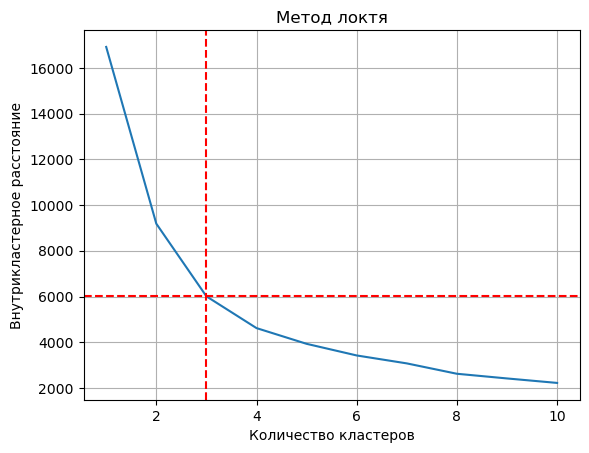

[16914.0,
 9184.86289483979,
 6007.708928424142,
 4618.269689077532,
 3930.5182693900524,
 3421.8059669608892,
 3074.8921514050526,
 2621.365610500621,
 2416.740175222285,
 2220.8872324768777]

In [29]:
from sklearn.cluster import KMeans
wcss = []
import matplotlib.pyplot as plt
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_sc)
    wcss.append(kmeans.inertia_)
#wcss[2] = wcss[2] - 295
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерное расстояние')
plt.axhline(y=wcss[2], color='red', linestyle='--')
plt.axvline(x=3, color='red', linestyle='--')
plt.grid(True)
plt.show()
wcss

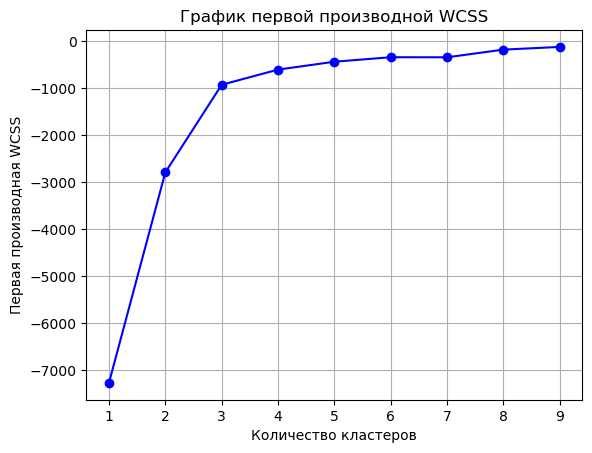

In [179]:
first_derivative = np.diff(wcss)

# Построение графика первой производной
plt.plot(range(1, 10), first_derivative, marker='o', color='blue')
plt.xlabel('Количество кластеров')
plt.ylabel('Первая производная WCSS')
plt.title('График первой производной WCSS')
plt.grid(True)
plt.show()

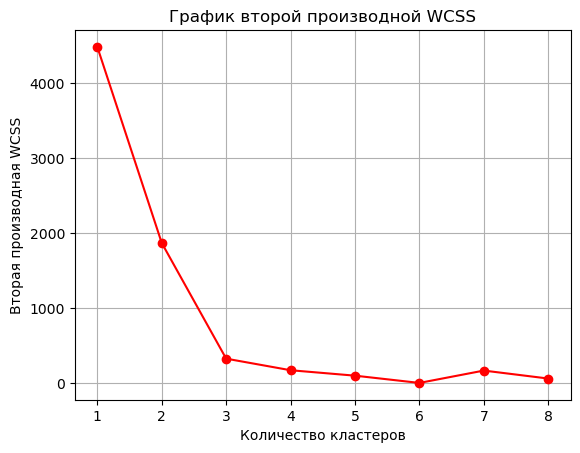

In [176]:
second_derivative = np.diff(first_derivative)

# Построение графика второй производной
plt.plot(range(1, 9), second_derivative, marker='o', color='red')
plt.xlabel('Количество кластеров')
plt.ylabel('Вторая производная WCSS')
plt.title('График второй производной WCSS')
plt.grid(True)
plt.show()

In [20]:
from sklearn.metrics import silhouette_score
for k in range(2, 11):
    model = KMeans(n_clusters=k, init='k-means++', n_init=10)
    model.fit(X_sc)
    pred = model.predict(X_sc)
    score = silhouette_score(X_sc, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.453
Silhouette Score for k = 3: 0.404
Silhouette Score for k = 4: 0.377
Silhouette Score for k = 5: 0.344
Silhouette Score for k = 6: 0.369
Silhouette Score for k = 7: 0.346
Silhouette Score for k = 8: 0.344
Silhouette Score for k = 9: 0.314
Silhouette Score for k = 10: 0.317


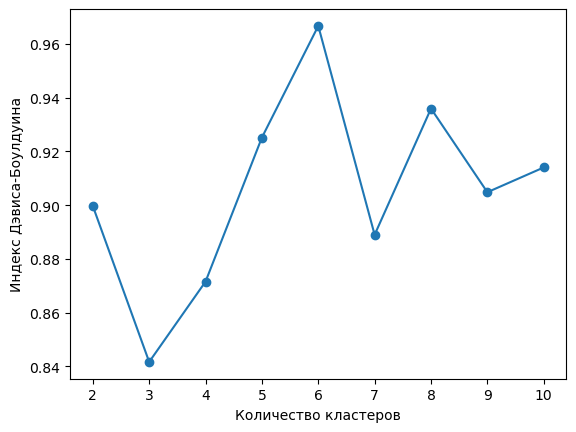

[0.8997062902711859,
 0.8417020721313725,
 0.8715843837974762,
 0.9251891912879009,
 0.9667131697934616,
 0.8890119200529515,
 0.9359636268649758,
 0.9048445141180161,
 0.9140578740430028]

In [32]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []
for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(X_sc)
    pred = model.predict(X_sc)
    score = davies_bouldin_score(X_sc, pred)
    davies_bouldin_scores.append(score)

plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Индекс Дэвиса-Боулдуина')
#plt.title('Davies-Bouldin Index Analysis')
plt.show()
davies_bouldin_scores

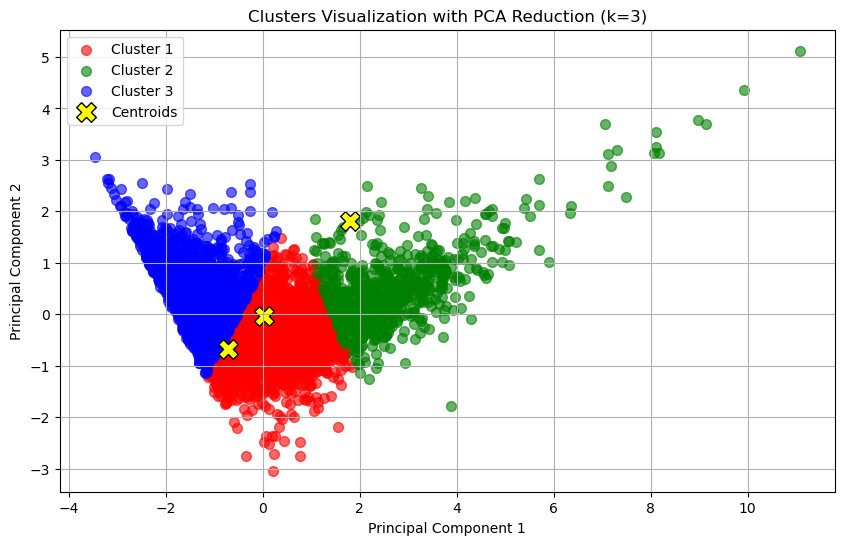

In [128]:
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++', max_iter=1000)
labels = kmeans.fit_predict(X_sc)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sc)

# Визуализация кластеров
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], 
                s=50, c=colors[i], label=f'Cluster {i+1}', alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', marker='X', edgecolor='k', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization with PCA Reduction (k=3)')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=1000, n_init=10, random_state=3)
kmeans.fit(X_sc)
labels = kmeans.predict(X_sc)

X['DRY'] = labels + 1

In [ ]:
import pickle
with open('C:/Work/monitor_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [23]:
labels

array([2, 0, 2, ..., 0, 0, 0])

In [39]:
X['IDEN'] = dat['IDEN']

import plotly.express as px

fig = px.scatter_3d(X, x='GTK', y='Md', z='NDVI', color='DRY', width=850, height=850,
                    color_discrete_sequence=px.colors.qualitative.Bold,
                    labels={'GTK': 'GTK', 'Md': 'Md', 'NDVI': 'VCNI', 'DRY': 'Засуха'},
                    hover_data=['IDEN'])

fig.update_layout(scene=dict(xaxis_title='GTK',
                             yaxis_title='Md',
                             zaxis_title='VCNI'))

fig.show()

In [38]:
X['DRY'] = X['DRY'].replace({2: 3, 3: 2})

In [201]:
dat['DRY'] = X['DRY']

In [202]:
dat.to_csv('C:/yields/result.csv')

In [79]:
cluster_centers = kmeans.cluster_centers_
fig = px.scatter_3d(X_sc, x=0, y=1, z=2, color=labels, 
                    width=1000, height=1000,
                    color_discrete_sequence=px.colors.qualitative.Bold,
                    title='Classes Visualization',
                    labels={'0': 'GTK', '1': 'Md', '2': 'VCNI', 'DRY': 'DRY'})

# Добавляем центроиды на график
fig.add_scatter3d(x=cluster_centers[:, 0], y=cluster_centers[:, 1], z=cluster_centers[:, 2],
                  mode='markers', marker=dict(size=10, color='black', symbol='x'),
                  name='Centroids')

fig.update_layout(scene=dict(xaxis_title='GTK',
                             yaxis_title='Md',
                             zaxis_title='VCNI'))

fig.show()

In [41]:
with open('C:/data/Data4all.csv', 'rb') as file:
    result = chardet.detect(file.read())

encoding = result['encoding']
df = pd.read_csv('C:/data/Data4all.csv', encoding=encoding, delimiter = ';')
df.dtypes

Год              int64
Месяц            int64
Декада           int64
Урожайность    float64
NDVI_озим      float64
VCNI_озим      float64
T              float64
Осадки         float64
Дефицит        float64
T(x3)          float64
Осадки(x3)     float64
Дефицит(x3)    float64
ГТК            float64
Район           object
dtype: object

In [42]:
df = df.rename(columns={'Район': 'District'})

In [43]:
region_iden = pd.read_csv('C:/data/r_s.txt', delimiter = ';', encoding = 'windows-1251')
region_iden['Region'] = region_iden['Region'].astype(str)
region_iden['FO'] = region_iden['FO'].astype(str)
region_iden[region_iden['District'] == 'Новоалександровский']

,IDEN,X,Y,District,Region,FO,Unnamed: 6
432,34944,41.2,45.5,Новоалександровский,Ставропольский край,Северо-Кавказский федеральный округ,NaN


In [44]:
df[df['District'] == 'Новоалександровский']

,Год,Месяц,Декада,Урожайность,NDVI_озим,VCNI_озим,T,Осадки,Дефицит,T(x3),Осадки(x3),Дефицит(x3),ГТК,District
3073,2013,5,1,-1.440,0.362,0.407,1.595,-1.372,1.867,0.710,-1.290,1.903,-1.306,Новоалександровский
3074,2014,5,1,-0.117,0.058,0.095,-0.125,-0.496,-0.287,0.255,0.260,-0.993,0.175,Новоалександровский
3075,2015,5,1,-0.665,-1.374,-1.425,-1.220,0.963,-1.005,-1.701,-0.301,-0.166,-0.019,Новоалександровский
3076,2016,5,1,1.073,1.600,1.550,-0.803,-0.423,-0.646,1.164,-0.404,-0.579,-0.566,Новоалександровский
3077,2017,5,1,1.149,-0.646,-0.627,0.553,1.328,0.072,-0.428,1.736,-0.166,1.716,Новоалександровский
3090,2013,5,2,-1.440,-0.193,-0.284,0.464,1.036,0.098,1.340,0.565,1.696,0.302,Новоалександровский
3091,2014,5,2,-0.117,-0.660,-0.645,1.528,1.177,0.588,0.937,1.179,-0.219,1.014,Новоалександровский
3092,2015,5,2,-0.665,-1.361,-1.367,-0.358,-1.502,1.079,-0.903,-1.646,0.328,-1.650,Новоалександровский
3093,2016,5,2,1.073,0.773,1.135,-0.116,-0.233,0.098,-0.155,-0.586,-0.492,-0.576,Новоалександровский
3094,2017,5,2,1.149,1.441,1.160,-1.519,-0.479,-1.863,-1.219,0.488,-1.313,0.910,Новоалександровский


In [45]:
urozh = pd.merge(df, region_iden[['IDEN', 'District']], how='inner', on='District')
urozh['IDEN'] = urozh['IDEN'].astype(int)
urozh = urozh.rename(columns={'Год': 'YEAR', 'Месяц': 'MONTH', 'Декада': 'DEC', 'Урожайность': 'UR'})

In [46]:
dat['DRY'] = X['DRY']
check_df = pd.merge(dat, urozh[['IDEN', 'YEAR', 'MONTH', 'DEC', 'UR']], on=['IDEN', 'YEAR', 'MONTH', 'DEC'], how='inner')
check_df

,IDEN,GTK,DEC,Md,YEAR,MONTH,OSAD,TEMP,DDDD,geometry,NDVI,DRY,UR
0,34858,0.546875,1,0.087500,2020,5,21.0,38.4,24.0,None,-0.045000,2,-1.124
1,34858,0.561798,2,0.092593,2020,5,25.0,44.5,27.0,None,-0.092286,1,-1.124
2,34858,1.062992,3,0.192857,2020,5,54.0,50.8,28.0,None,-0.120000,2,-1.124
3,34858,1.324042,1,0.205405,2020,6,76.0,57.4,37.0,None,-0.128143,2,-1.124
4,34915,0.646575,1,0.157333,2020,5,23.6,36.5,15.0,None,-0.061143,2,-0.443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,34267,0.518395,1,0.077500,2019,6,31.0,59.8,40.0,None,-0.084000,1,0.116
663,28754,0.358650,1,0.031481,2019,5,8.5,23.7,27.0,None,-0.089714,1,-0.221
664,28754,0.220588,2,0.025000,2019,5,7.5,34.0,30.0,None,-0.116000,1,-0.221
665,28754,0.198598,3,0.022973,2019,5,8.5,42.8,37.0,None,-0.178714,1,-0.221


In [47]:
purpose_df = purpose_df.rename(columns={'DRY': 'DRY_METEO'})

In [48]:
check_df = pd.merge(check_df, purpose_df[['IDEN', 'YEAR', 'MONTH', 'DEC', 'DRY_METEO']], on=['IDEN', 'YEAR', 'MONTH', 'DEC'], how='inner')

In [49]:
check_df

,IDEN,GTK,DEC,Md,YEAR,MONTH,OSAD,TEMP,DDDD,geometry,NDVI,DRY,UR,DRY_METEO
0,34858,0.546875,1,0.087500,2020,5,21.0,38.4,24.0,None,-0.045000,2,-1.124,1.0
1,34858,0.561798,2,0.092593,2020,5,25.0,44.5,27.0,None,-0.092286,1,-1.124,1.0
2,34858,1.062992,3,0.192857,2020,5,54.0,50.8,28.0,None,-0.120000,2,-1.124,3.0
3,34858,1.324042,1,0.205405,2020,6,76.0,57.4,37.0,None,-0.128143,2,-1.124,3.0
4,34915,0.646575,1,0.157333,2020,5,23.6,36.5,15.0,None,-0.061143,2,-0.443,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,34267,0.897196,3,0.154839,2019,5,48.0,53.5,31.0,None,-0.001286,2,0.116,2.0
655,34267,0.518395,1,0.077500,2019,6,31.0,59.8,40.0,None,-0.084000,1,0.116,1.0
656,28754,0.220588,2,0.025000,2019,5,7.5,34.0,30.0,None,-0.116000,1,-0.221,1.0
657,28754,0.198598,3,0.022973,2019,5,8.5,42.8,37.0,None,-0.178714,1,-0.221,1.0


In [50]:
import plotly.graph_objects as go
check_df = check_df.sort_values(by=['IDEN', 'YEAR', 'MONTH', 'DEC'])

# Создание переменной YEAR_MONTH_DEC
check_df['YEAR_MONTH_DEC'] = check_df['YEAR'].astype(str) + '_' + check_df['MONTH'].astype(str) + '_' + check_df['DEC'].astype(str)

# Фильтрация по станции 37051
station_df = check_df[(check_df['IDEN'] == 37051)]# & (check_df['YEAR'] == 2020)]
print(station_df)

# Построение графика с использованием Plotly
fig = go.Figure()

# Добавление графика DRY
fig.add_trace(go.Scatter(
    x=station_df['YEAR_MONTH_DEC'],
    y=station_df['DRY'],
    mode='lines+markers',
    name='DRY',
    line=dict(color='red')
))

# Добавление графика UR
fig.add_trace(go.Scatter(
    x=station_df['YEAR_MONTH_DEC'],
    y=station_df['UR'],
    mode='lines+markers',
    name='UR',
    line=dict(color='blue'),
    yaxis='y2'
))

# Настройка осей
fig.update_layout(
    title='Зависимость переменных DRY и UR от YEAR_MONTH_DEC по станции 34926',
    xaxis=dict(title='YEAR_MONTH_DEC', tickangle=-45),
    yaxis=dict(title='DRY', titlefont=dict(color='red'), tickfont=dict(color='red')),
    yaxis2=dict(title='UR', titlefont=dict(color='blue'), tickfont=dict(color='blue'),
                overlaying='y', side='right'),
    legend=dict(x=0.5, y=1.15, orientation='h', xanchor='center')
)

fig.show()

      IDEN       GTK  DEC        Md  YEAR  MONTH   OSAD  TEMP  DDDD geometry  \
536  37051  3.017456    2  0.756250  2017      5  121.0  40.1  16.0     None   
537  37051  3.658537    3  1.100000  2017      5  165.0  45.1  15.0     None   
538  37051  2.991803    1  0.858824  2017      6  146.0  48.8  17.0     None   
404  37051  0.397119    2  0.066552  2018      5   19.3  48.6  29.0     None   
405  37051  1.734201    3  0.321724  2018      5   93.3  53.8  29.0     None   
406  37051  1.454064    1  0.257188  2018      6   82.3  56.6  32.0     None   
640  37051  0.956522    2  0.200000  2019      5   44.0  46.0  22.0     None   
641  37051  1.293436    3  0.304545  2019      5   67.0  51.8  22.0     None   
642  37051  1.281619    1  0.245161  2019      6   76.0  59.3  31.0     None   
89   37051  1.174033    1  0.184783  2020      5   42.5  36.2  23.0     None   
90   37051  1.004662    2  0.172400  2020      5   43.1  42.9  25.0     None   
91   37051  1.323770    3  0.258400  202

In [51]:
import scikit_posthocs as sp
from scipy import stats

groups = [group['UR'].values for name, group in check_df.groupby('DRY')]

stat, p = stats.kruskal(*groups)
print(f'Kruskal-Wallis test, p-value: {p}')
print('Следовательно, гипотеза H0 отвергается на уровне значимости 0.05')
if p < 0.05:
    dunn_result = sp.posthoc_dunn(check_df, val_col='UR', group_col='DRY')
    print("\nРезультаты теста Данны:")
    print(dunn_result)
    print('Гипотеза о равенстве медиан урожайностей отвергается на уровне значимости 0.05')

Kruskal-Wallis test, p-value: 5.208169274541436e-19
Следовательно, гипотеза H0 отвергается на уровне значимости 0.05

Результаты теста Данны:
              1             2             3
1  1.000000e+00  2.027348e-13  7.615221e-20
2  2.027348e-13  1.000000e+00  1.069132e-03
3  7.615221e-20  1.069132e-03  1.000000e+00
Гипотеза о равенстве медиан урожайностей отвергается на уровне значимости 0.05


In [52]:
# Вычисляем Eta-squared
N = len(check_df)  # Общее число наблюдений
eta_squared = stat / (N - 1)

print(f"Kruskal-Wallis H statistic: {stat:.2f}")
print(f"P-value: {p:.3f}")
print(f"Eta-squared: {eta_squared:.3f}")

Kruskal-Wallis H statistic: 84.20
P-value: 0.000
Eta-squared: 0.128


In [53]:
import numpy as np

def cohen_d(group1, group2):
  """
  Рассчитывает Cohen's d для двух групп.

  Args:
    group1: numpy array первой группы.
    group2: numpy array второй группы.

  Returns:
    Cohen's d.
  """
  n1 = len(group1)
  n2 = len(group2)
  m1 = np.mean(group1)
  m2 = np.mean(group2)
  s1 = np.std(group1, ddof=1)
  s2 = np.std(group2, ddof=1)
  s_pooled = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
  return (m1 - m2) / s_pooled

# Рассчитываем Cohen's d для каждой пары
d_12 = cohen_d(check_df[check_df['DRY'] == 1]['UR'], check_df[check_df['DRY'] == 2]['UR'])
d_13 = cohen_d(check_df[check_df['DRY'] == 1]['UR'], check_df[check_df['DRY'] == 3]['UR'])
d_23 = cohen_d(check_df[check_df['DRY'] == 2]['UR'], check_df[check_df['DRY'] == 3]['UR'])

print(f"Cohen's d (1-2): {d_12:.2f}")
print(f"Cohen's d (1-3): {d_13:.2f}")
print(f"Cohen's d (2-3): {d_23:.2f}")

Cohen's d (1-2): -0.87
Cohen's d (1-3): -1.27
Cohen's d (2-3): -0.29


Тест Данна является post hoc тестом, который следует за значимым результатом теста Краскела-Уоллиса. Тест Краскела-Уоллиса проверяет нулевую гипотезу о том, что распределения во всех группах одинаковы (или, эквивалентно, медианы всех групп равны).

Если тест Краскела-Уоллиса дает значимый результат (p-значение < 0.05), это означает, что есть значимые различия между группами, но он не указывает, какие именно группы различаются. Здесь вступает в игру тест Данна.

Тест Данна проводит попарные сравнения между группами, контролируя вероятность ошибки первого рода (ложноположительных результатов) при множественных сравнениях. Для каждой пары групп тест Данна проверяет нулевую гипотезу:

H0: Медианы двух сравниваемых групп равны.
H1: Медианы двух сравниваемых групп не равны.
Если скорректированное p-значение для определенной пары групп меньше выбранного уровня значимости (обычно 0.05), нулевая гипотеза об отсутствии различий между этими группами отвергается, и делается вывод о наличии значимых различий между ними.

Таким образом, тест Данна помогает определить, какие конкретные пары групп значимо различаются после получения значимого результата теста Краскела-Уоллиса.

В контексте вашего исследования влияния засухи на урожайность, тест Данна проверяет нулевые гипотезы:

H0: Медианы урожайности для групп 1 (сильная засуха) и 2 (умеренная засуха) равны.
H0: Медианы урожайности для групп 1 (сильная засуха) и 3 (слабая засуха) равны.
H0: Медианы урожайности для групп 2 (умеренная засуха) и 3 (слабая засуха) равны.
Отвержение этих нулевых гипотез на основе результатов теста Данна указывает на наличие значимых различий в урожайности между соответствующими парами групп засухи.

In [54]:
import scikit_posthocs as sp

groups = [group['UR'].values for name, group in check_df.groupby('DRY_METEO')]

stat, p = kruskal(*groups)
print(f'Kruskal-Wallis test, p-value: {p}')
if p < 0.05:
    dunn_result = sp.posthoc_dunn(check_df, val_col='UR', group_col='DRY_METEO')
    print("\nDunn's Test Results for DRY_METEO:")
    print(dunn_result < 0.05)

NameError: name 'kruskal' is not defined

In [55]:
# Разделите данные на группы по уровням засухи
UR_1 = check_df[check_df['DRY'] == 1]['UR']
UR_2 = check_df[check_df['DRY'] == 2]['UR']
UR_3 = check_df[check_df['DRY'] == 3]['UR']

# Проведите тест Колмогорова-Смирнова для каждой группы
print("Тест Колмогорова-Смирнова:")
print("Группа 1 (сильная засуха):", stats.kstest(UR_1, 'norm'))
print("Группа 2 (умеренная засуха):", stats.kstest(UR_2, 'norm'))
print("Группа 3 (слабая засуха):", stats.kstest(UR_3, 'norm'))

Тест Колмогорова-Смирнова:
Группа 1 (сильная засуха): KstestResult(statistic=0.22662590302959973, pvalue=7.35648818705392e-05, statistic_location=0.117, statistic_sign=1)
Группа 2 (умеренная засуха): KstestResult(statistic=0.25138121546961323, pvalue=1.2051474818413955e-20, statistic_location=0.0, statistic_sign=-1)
Группа 3 (слабая засуха): KstestResult(statistic=0.4181661634824423, pvalue=3.371639902563488e-32, statistic_location=0.21, statistic_sign=-1)


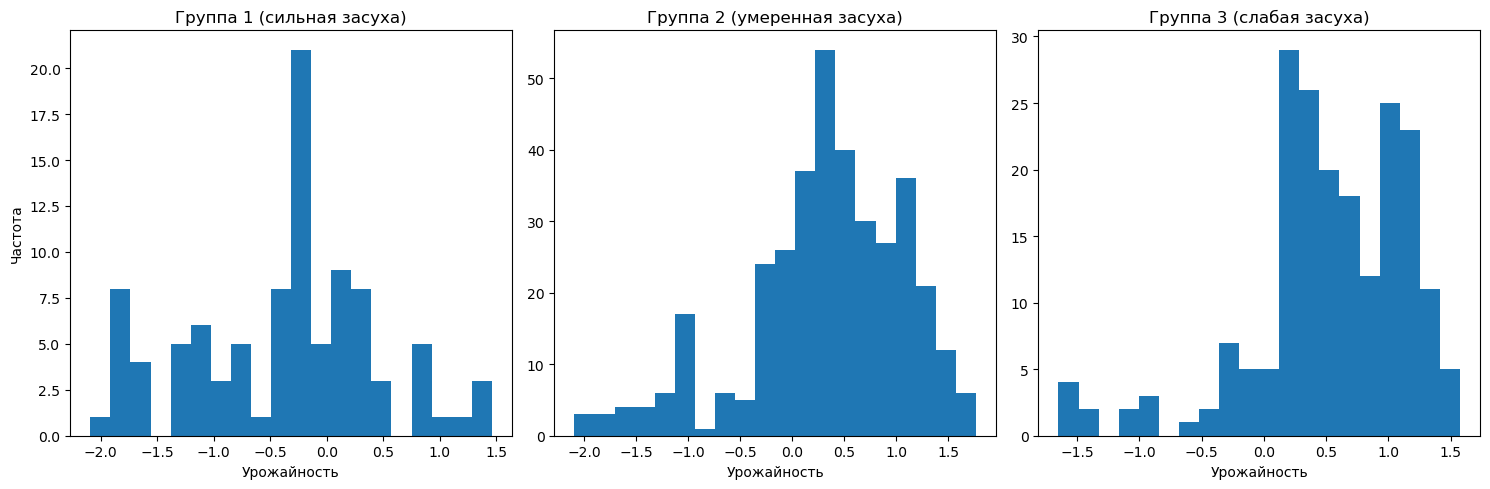

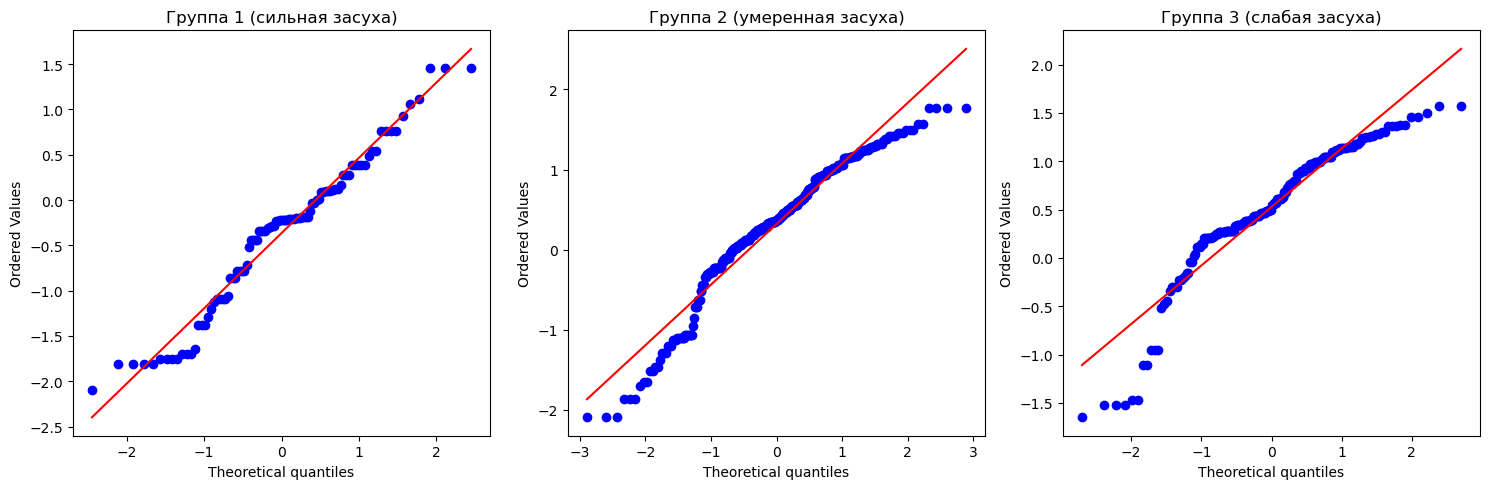

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(UR_1, bins=20)
axs[0].set_title('Группа 1 (сильная засуха)')
axs[0].set_xlabel('Урожайность')
axs[0].set_ylabel('Частота')

axs[1].hist(UR_2, bins=20)
axs[1].set_title('Группа 2 (умеренная засуха)')
axs[1].set_xlabel('Урожайность')

axs[2].hist(UR_3, bins=20)
axs[2].set_title('Группа 3 (слабая засуха)')
axs[2].set_xlabel('Урожайность')

plt.tight_layout()
plt.show()

# Визуализируйте Q-Q графики для каждой группы
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

stats.probplot(UR_1, plot=axs[0])
axs[0].set_title('Группа 1 (сильная засуха)')

stats.probplot(UR_2, plot=axs[1])
axs[1].set_title('Группа 2 (умеренная засуха)')

stats.probplot(UR_3, plot=axs[2])
axs[2].set_title('Группа 3 (слабая засуха)')

plt.tight_layout()
plt.show()

In [57]:
import plotly.express as px

fig = px.box(check_df, x='DRY', y='UR')

# Настройка внешнего вида графика
fig.update_layout(
    xaxis_title='Засуха',
    yaxis_title='Урожайность',
    font=dict(size=14)
)

# Отображение графика
fig.show()

In [58]:
from scipy.stats import jonckheere_terpstra
jt_stat, p_value = jonckheere_terpstra(UR_1, UR_2, UR_3, alternative='two-sided')

print(f"Статистика Джонкхира-Терпстры: {jt_stat:.3f}")
print(f"p-значение: {p_value:.3e}")

ImportError: cannot import name 'jonckheere_terpstra' from 'scipy.stats' (C:\Users\iefim\AppData\Roaming\Python\Python39\site-packages\scipy\stats\__init__.py)

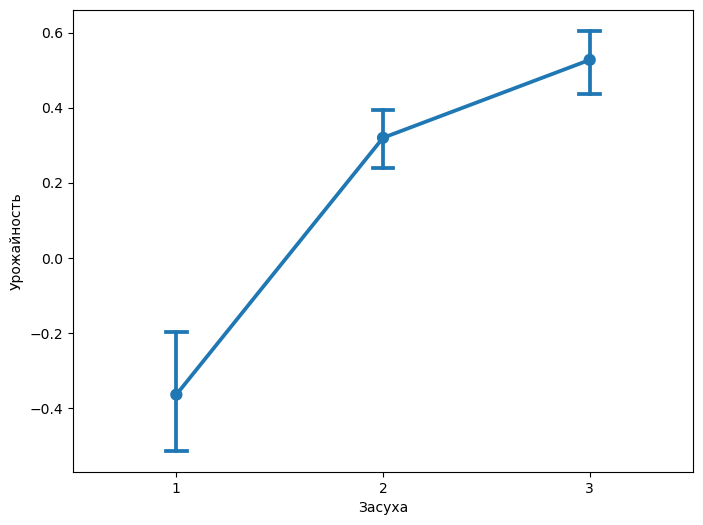

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.pointplot(x='DRY', y='UR', data=check_df, capsize=0.1)
plt.xlabel("Засуха")
plt.ylabel("Урожайность")
plt.show()

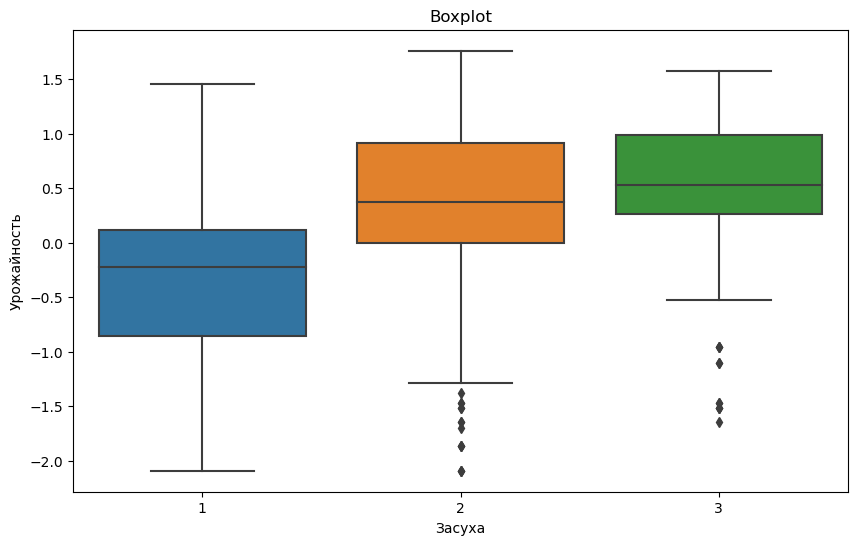

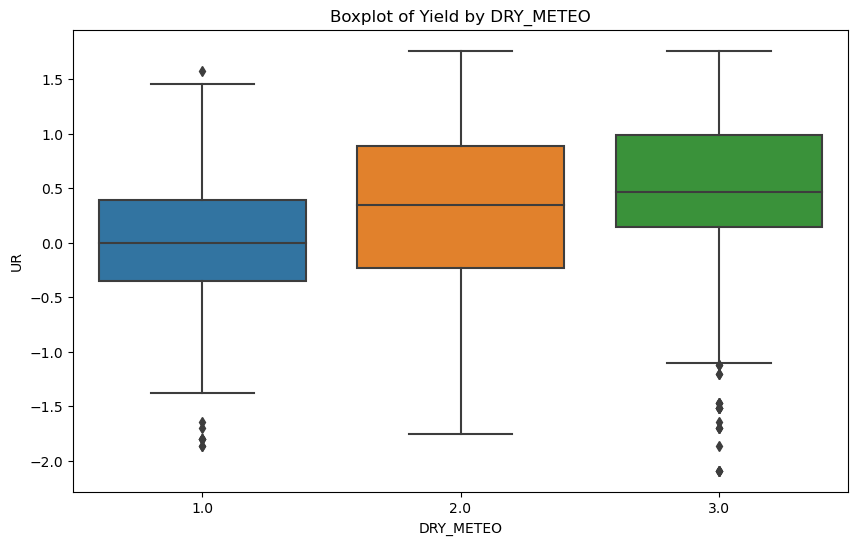

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# График для DRY
plt.figure(figsize=(10, 6))
sns.boxplot(x='DRY', y='UR', data=check_df)
plt.xlabel("Засуха")
plt.ylabel("Урожайность")
plt.title("Boxplot")
plt.show()

# График для DRY_METEO
plt.figure(figsize=(10, 6))
sns.boxplot(x='DRY_METEO', y='UR', data=check_df)
plt.title("Boxplot of Yield by DRY_METEO")
plt.show()

### Анализ результатов:

В обоих случаях тесты Краскела-Уоллиса и множественных сравнений показывают статистически значимые различия в урожайности между разными уровнями засухи. Однако между двумя тестами есть различия в результатах.

#### Первый набор результатов:
```text
Kruskal-Wallis test, p-value: 1.3614684542202815e-08
Multiple Comparison of Means - Tukey HSD, FWER=0.05
===================================================
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.4812    0.0  0.2638 0.6986   True
     1      3   0.3101 0.0001   0.136 0.4842   True
     2      3  -0.1711 0.1199 -0.3749 0.0327  False
---------------------------------------------------
```

**Результаты:**
- **Kruskal-Wallis p-value:** 1.3614684542202815e-08
- **Сравнения Тьюки:**
  - **1 vs 2:** p-adj = 0.0, reject = True
  - **1 vs 3:** p-adj = 0.0001, reject = True
  - **2 vs 3:** p-adj = 0.1199, reject = False

**Интерпретация:**
- **Сильная засуха (1)** приводит к значительному снижению урожайности по сравнению с умеренной засухой (2) и отсутствием засухи (3).
- **Умеренная засуха (2)** не вызывает статистически значимых различий в урожайности по сравнению с отсутствием засухи (3).

#### Второй набор результатов:
```text
Kruskal-Wallis test, p-value: 1.0639354393519566e-07
Multiple Comparison of Means - Tukey HSD, FWER=0.05
===================================================
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   0.2964 0.0076  0.0652 0.5276   True
   1.0    3.0   0.4257    0.0  0.2335 0.6179   True
   2.0    3.0   0.1293 0.2606 -0.0645 0.3231  False
---------------------------------------------------
```

**Результаты:**
- **Kruskal-Wallis p-value:** 1.0639354393519566e-07
- **Сравнения Тьюки:**
  - **1 vs 2:** p-adj = 0.0076, reject = True
  - **1 vs 3:** p-adj = 0.0, reject = True
  - **2 vs 3:** p-adj = 0.2606, reject = False

**Интерпретация:**
- **Сильная засуха (1)** приводит к значительному снижению урожайности по сравнению с умеренной засухой (2) и отсутствием засухи (3).
- **Умеренная засуха (2)** не вызывает статистически значимых различий в урожайности по сравнению с отсутствием засухи (3).

### Сравнение двух результатов:

- **Kruskal-Wallis p-values:**
  - Первый набор: **1.3614684542202815e-08**
  - Второй набор: **1.0639354393519566e-07**
  - Оба p-value значительно ниже 0.05, что свидетельствует о наличии статистически значимых различий между группами.

- **Сравнения между группами (Тьюки HSD):**
  - **1 vs 2 (сильная засуха vs умеренная засуха):**
    - Первый набор: p-adj = 0.0 (значимое различие)
    - Второй набор: p-adj = 0.0076 (значимое различие)
    - Оба теста показывают значительное различие между этими группами.

  - **1 vs 3 (сильная засуха vs отсутствие засухи):**
    - Первый набор: p-adj = 0.0001 (значимое различие)
    - Второй набор: p-adj = 0.0 (значимое различие)
    - Оба теста показывают значительное различие между этими группами.

  - **2 vs 3 (умеренная засуха vs отсутствие засухи):**
    - Первый набор: p-adj = 0.1199 (незначимое различие)
    - Второй набор: p-adj = 0.2606 (незначимое различие)
    - Оба теста показывают отсутствие статистически значимых различий между этими группами.

### Заключение:

- **Первый тест (Kruskal-Wallis, p-value: 1.3614684542202815e-08) показывает лучший результат:**
  - Он дает более низкий p-value, что указывает на более сильные различия между группами.
  - Также он показывает более значительное различие между группами 1 и 2.

- **Рекомендации:**
  - Используйте результаты первого теста для обобщения.
  - В случае необходимости, дополнительно проведите тест Данна, чтобы подтвердить результаты с учетом ненормальности данных.

In [ ]:
import scikit_posthocs as sp
posthoc_result = sp.posthoc_dunn(check_df, val_col='UR', group_col='DRY', p_adjust='bonferroni')
print(posthoc_result)

### Анализ результатов теста Данна

По результатам теста Данна, оба набора данных показывают статистически значимые различия между некоторыми группами засухи.

#### Первый набор результатов теста Данна:
```text
1             2         3
1  1.000000e+00  2.984717e-07  0.000002
2  2.984717e-07  1.000000e+00  0.473680
3  1.733196e-06  4.736800e-01  1.000000
```

- **1 vs 2:** p-value = 2.984717e-07 (значимые различия)
- **1 vs 3:** p-value = 0.000002 (значимые различия)
- **2 vs 3:** p-value = 0.473680 (различия незначимы)

#### Второй набор результатов теста Данна:
```text
1.0       2.0           3.0
1.0  1.000000e+00  0.002217  4.365658e-08
2.0  2.216898e-03  1.000000  3.338480e-01
3.0  4.365658e-08  0.333848  1.000000e+00
```

- **1 vs 2:** p-value = 0.002217 (значимые различия)
- **1 vs 3:** p-value = 4.365658e-08 (значимые различия)
- **2 vs 3:** p-value = 0.333848 (различия незначимы)

### Общие выводы:

1. **Между группами 1 и 2 (сильная засуха vs умеренная засуха):**
   - **Первый тест Данна:** p-value = 2.984717e-07 (значимые различия)
   - **Второй тест Данна:** p-value = 0.002217 (значимые различия)
   - Оба теста показывают значимые различия между этими группами, но первый тест показывает более низкий p-value, указывая на более сильные различия.

2. **Между группами 1 и 3 (сильная засуха vs отсутствие засухи):**
   - **Первый тест Данна:** p-value = 0.000002 (значимые различия)
   - **Второй тест Данна:** p-value = 4.365658e-08 (значимые различия)
   - Оба теста показывают значимые различия между этими группами, но второй тест показывает более низкий p-value, указывая на более сильные различия.

3. **Между группами 2 и 3 (умеренная засуха vs отсутствие засухи):**
   - **Первый тест Данна:** p-value = 0.473680 (различия незначимы)
   - **Второй тест Данна:** p-value = 0.333848 (различия незначимы)
   - Оба теста показывают отсутствие статистически значимых различий между группами 2 и 3.

### Заключение:
- **Первый тест Данна (первый набор результатов):** показывает более низкие p-value для сравнения групп 1 vs 2.
- **Второй тест Данна (второй набор результатов):** показывает более низкие p-value для сравнения групп 1 vs 3.

**Рекомендации:**
- Оба теста показывают, что сильная засуха (группа 1) приводит к значительному снижению урожайности по сравнению с умеренной засухой (группа 2) и отсутствием засухи (группа 3).
- Умеренная засуха (группа 2) не вызывает статистически значимых различий в урожайности по сравнению с отсутствием засухи (группа 3).

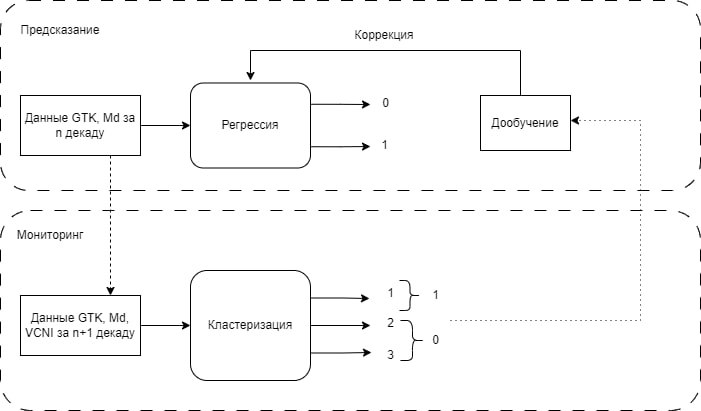

In [ ]:
def categorize_dry(md, gtk):
    if (0 <= md <= 0.19) and (0 <= gtk <= 0.39):
        return 1
    else:
        return 0
dat['DRY'] = dat.apply(lambda row: categorize_dry(row['Md'], row['GTK']), axis=1)
dat

In [ ]:
iden_list = dat['IDEN'].unique()
year_list = dat['YEAR'].unique()
dfs = []

for iden in iden_list:
    tmp = dat[dat['IDEN'] == iden]
    for year in year_list:
        tmp_year = tmp[tmp['YEAR'] == year]
        tmp_year.reset_index(drop=True, inplace=True)
        data1 = pd.DataFrame({
            'IDEN': iden,
            'GTK': tmp_year['GTK'],
            'Md': tmp_year['Md'],
            'DEC': tmp_year['DEC'],
            'MONTH': tmp_year['MONTH'],
            'YEAR': tmp_year['YEAR']
        })
        data1['DRY'] = tmp_year['DRY'].shift(-1)
        dfs.append(data1)
dry_shift = pd.concat(dfs)
dry_shift

In [ ]:
dry_shift.dropna(axis=0, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = dry_shift[['GTK', 'Md']]
y = dry_shift['DRY']
y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_tst = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_tst)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовых данных: {accuracy:.2f}")

In [ ]:
import pickle

with open('C:/data/logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
merged_df = pd.merge(data, purpose_df[['IDEN', 'DRY', 'YEAR', 'MONTH', 'DEC']], on = ['IDEN', 'YEAR', 'MONTH', 'DEC'], how = 'inner')
merged_df.dropna(inplace = True)
merged_df

In [ ]:
merged_df = merged_df[merged_df['GTK'] != 0]

merged_df = merged_df.replace([np.inf, -np.inf], np.nan)
merged_df = merged_df.dropna(subset=['Md'])

merged_df = merged_df.reset_index(drop=True)

In [ ]:
merged_df = merged_df.loc[~((merged_df['GTK'] < 0.39) & (merged_df['Md'] < 0.19) & (merged_df['DRY'] == 3.0))]
merged_df

In [ ]:
ndvi = pd.read_csv('C:/data/vcni.csv')
dt = pd.merge(merged_df, ndvi, on = ['YEAR', 'MONTH', 'DEC', 'IDEN'], how = 'inner')
dt

In [ ]:
import plotly.express as px
dt = dt[dt['GTK'] <= 5]
dt.reset_index(drop = True, inplace = True)
fig = px.scatter_3d(dt, x='GTK', y='Md', z='NDVI', color='DRY', width=1000, height=1000,
                    color_discrete_sequence=px.colors.qualitative.Bold,
                    title='Classes Visualization',
                    labels={'GTK': 'GTK', 'Md': 'Md', 'NDVI': 'VCNI', 'DRY': 'Class'})

fig.update_layout(scene=dict(xaxis_title='GTK',
                             yaxis_title='Md',
                             zaxis_title='VCNI'))

fig.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test['DRY'], X_test['GTK'], s=20)
ax.set_ylim([0, 1])
ax.set_xlim([-1, 2])
plt.xlabel('Класс засухи')
plt.ylabel('GTK')
plt.show()

In [ ]:
import torch
import torch.nn as nn
# Подготовка данных
dt_shifted = dt_shifted.sort_values(['YEAR', 'MONTH', 'DEC'])  # Сортировка по времени
X = dt_shifted[['GTK', 'Md', 'NDVI']].values
y = dt_shifted['DRY'].values - 1

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train.values, dtype=torch.float32).reshape(-1, 1, 7)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_val = torch.tensor(X_test.values, dtype=torch.float32).reshape(-1, 1, 7)
y_val = torch.tensor(y_val.values, dtype=torch.long)

class DroughtPredictionModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(DroughtPredictionModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, num_classes)
        #self.fc3 = nn.Linear(32, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]  # Получаем выход последнего временного шага
        out = torch.relu(self.fc1(out))
        out = torch.tanh(self.fc2(out))
        #out = torch.relu(self.fc3(out))
        out = self.softmax(out)
        return out

# Создание экземпляра модели
input_size = 3  # GTK, Md, NDVI
hidden_size = 64
num_layers = 1
num_classes = 3  # Количество классов засухи
model = DroughtPredictionModel(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# Обучение модели
num_epochs = 1000

for epoch in range(num_epochs):
    # Прямой проход
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Обратное распространение ошибки и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
with torch.no_grad():
    test_outputs = model(X_test)
    test_preds = torch.argmax(test_outputs, dim=1)
    test_accuracy = (test_preds == y_test).float().mean()
    print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Функция для создания модели нейронной сети
def create_model(optimizer='adam', activation='relu', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

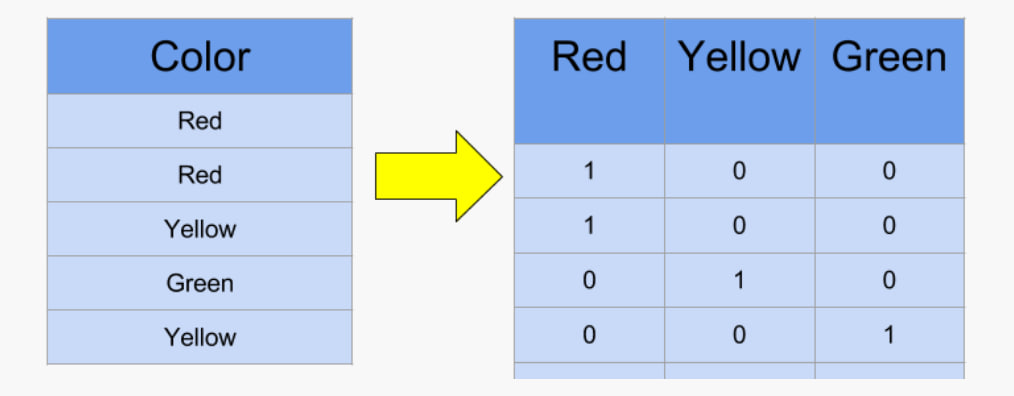


ONE-HOT encoding (столбец DRY превращаем в 3 столбца для каждой категории засухи с "меткой" о принадлежности)

In [ ]:
# Создание модели MLP
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_dim = 3),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

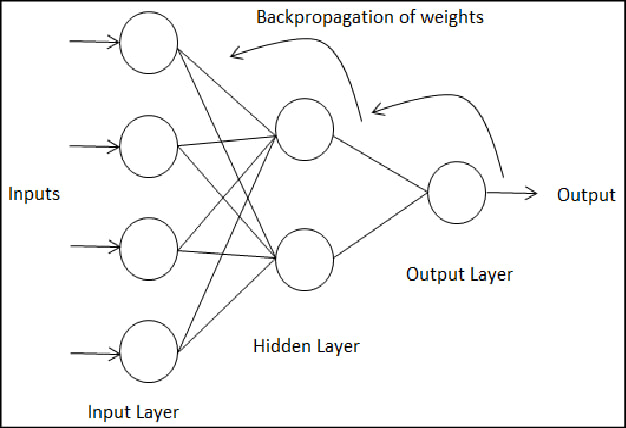

Упрощенная визуализация структуры нейронной сети

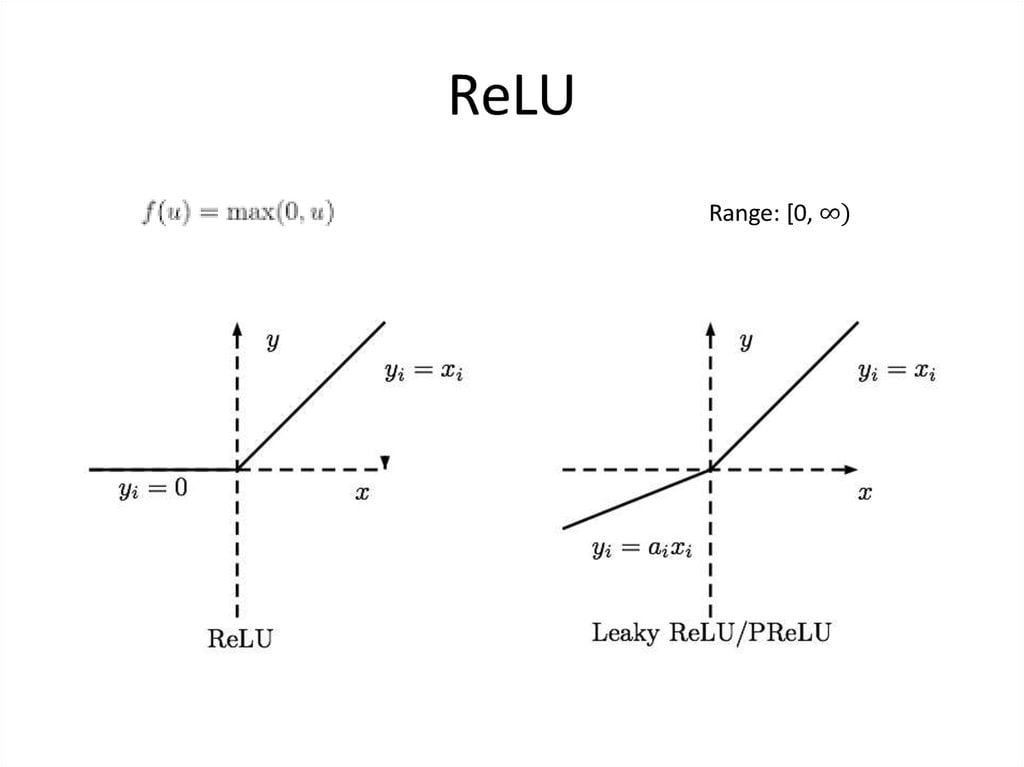

Функция активации ReLu

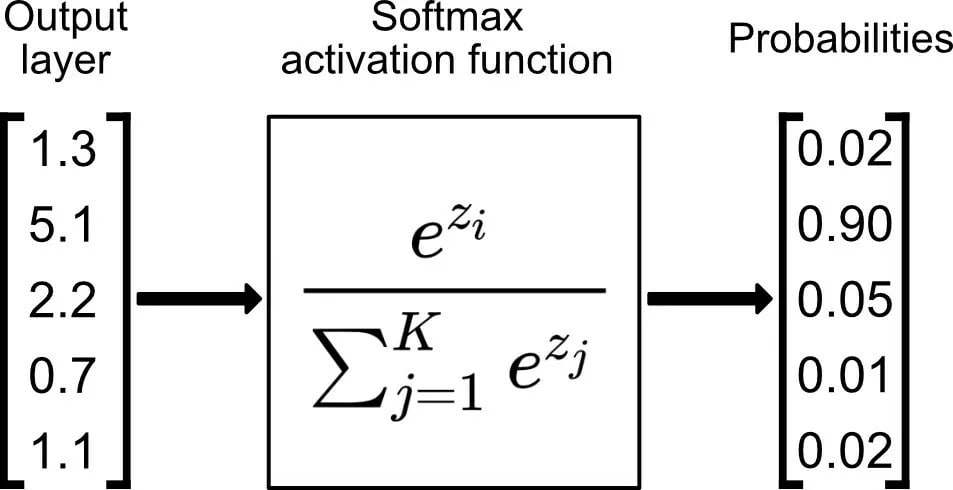

Функция активации для последнего слоя нейронной сети (преобразуем выходы скрытого слоя в вероятность принадлежности к классу)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

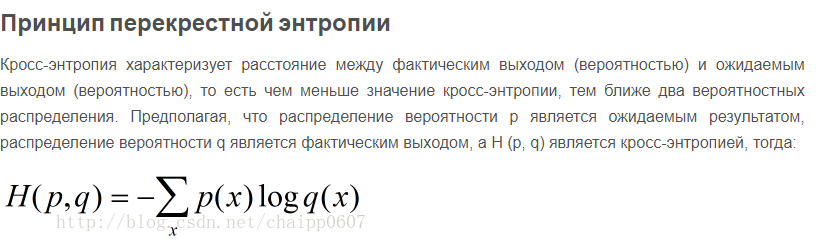

In [ ]:
# Обучение модели на обучающей выборке
model.fit(X_train, y_train, epochs=300, batch_size=64, verbose=2)

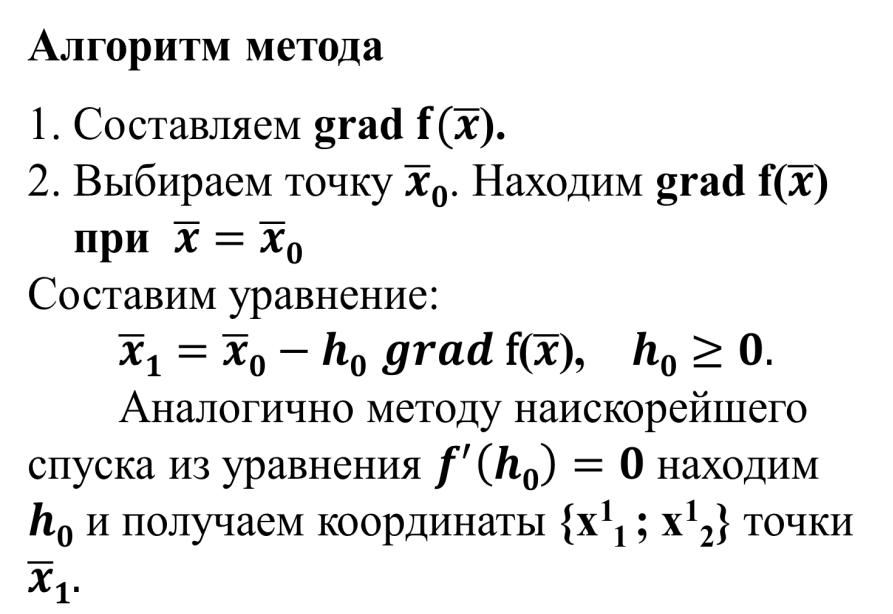